In [46]:
import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [47]:
td = data.tourism_data

models = {}

In [48]:
X1 = np.array(td["Tourism_Numbers"]).reshape(-1, 1)
X2 = np.array(td["Local"]).reshape(-1, 1)
assert X1.shape == X2.shape

X = np.hstack((X1, X2))

for i in td:
    if i == "Tourism_Numbers" or i == "Year":
        continue
    # Convert the dependent variable `td[i]` to a numpy array and reshape
    y = np.array(td[i]).reshape(-1, 1)
    # Find valid entries (those not equal to -1) and create the mask
    mask = y != -1
    # Apply the mask to both `y` and `X`, ensuring `X_mask` remains 2D
    y = y[mask].reshape(-1, 1)
    X_mask = X[mask.flatten()]
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_mask, y)
    print(f"Model for {i}: Coefficients = {model.coef_}, Intercept = {model.intercept_}")
    models[i] = model


Model for Local: Coefficients = [[1.17090555e-18 1.00000000e+00]], Intercept = [-1.45519152e-11]
Model for stsfy: Coefficients = [[-4.69352865e-05 -6.08449123e-03]], Intercept = [407.6518514]
Model for Crowding_at_Mendenhall_Glacier: Coefficients = [[ 1.15730843e-05 -1.78738572e-03]], Intercept = [100.15433801]
Model for Crowding_on_sidewalks_downtown: Coefficients = [[6.42949131e-06 2.34034126e-03]], Intercept = [-25.69203444]
Model for Vehicle_congestion_downtown: Coefficients = [[2.31461687e-05 1.64252286e-02]], Intercept = [-496.69132398]
Model for Flightseeing_noise: Coefficients = [[-9.00128783e-06 -1.52764778e-02]], Intercept = [540.76884821]
Model for Air_emissions_from_cruise_ships: Coefficients = [[-1.54307791e-05 -1.76168190e-02]], Intercept = [618.46088265]
Model for Vehicle_congestion_outside_of_downtown: Coefficients = [[ 1.92884739e-06 -2.02978976e-02]], Intercept = [683.19238967]
Model for Whale_watching_boat_traffic_and_wakes: Coefficients = [[1.41448809e-05 1.14875078

In [49]:
# 用模型来计算其他年份的数据
td_pred = {}
for key in td.keys():
    td_pred[key] = []
    
print(td_pred)

{'Year': [], 'Local': [], 'Tourism_Numbers': [], 'stsfy': [], 'Crowding_at_Mendenhall_Glacier': [], 'Crowding_on_sidewalks_downtown': [], 'Vehicle_congestion_downtown': [], 'Flightseeing_noise': [], 'Air_emissions_from_cruise_ships': [], 'Vehicle_congestion_outside_of_downtown': [], 'Whale_watching_boat_traffic_and_wakes': [], 'Crowding_on_trails': [], 'Street_Services': [], 'Wastewater': [], 'Public_Transit': [], 'Parks_and_Recreation': [], 'Docks': [], 'Ports': [], 'JNU_Composite': [], 'Grocery_Items': [], 'JNU_Housing': [], 'Utilities': [], 'Transportation': [], 'Healthcare': [], 'Misc._Good_and_Services': []}


In [50]:
for key in td_pred:
    if key == "Tourism_Numbers" or key == "Year":
        td_pred[key] = td[key]
        continue
    model = models[key]
    y = model.predict(X)
    td_pred[key] = y.flatten()

年份和指标的关系

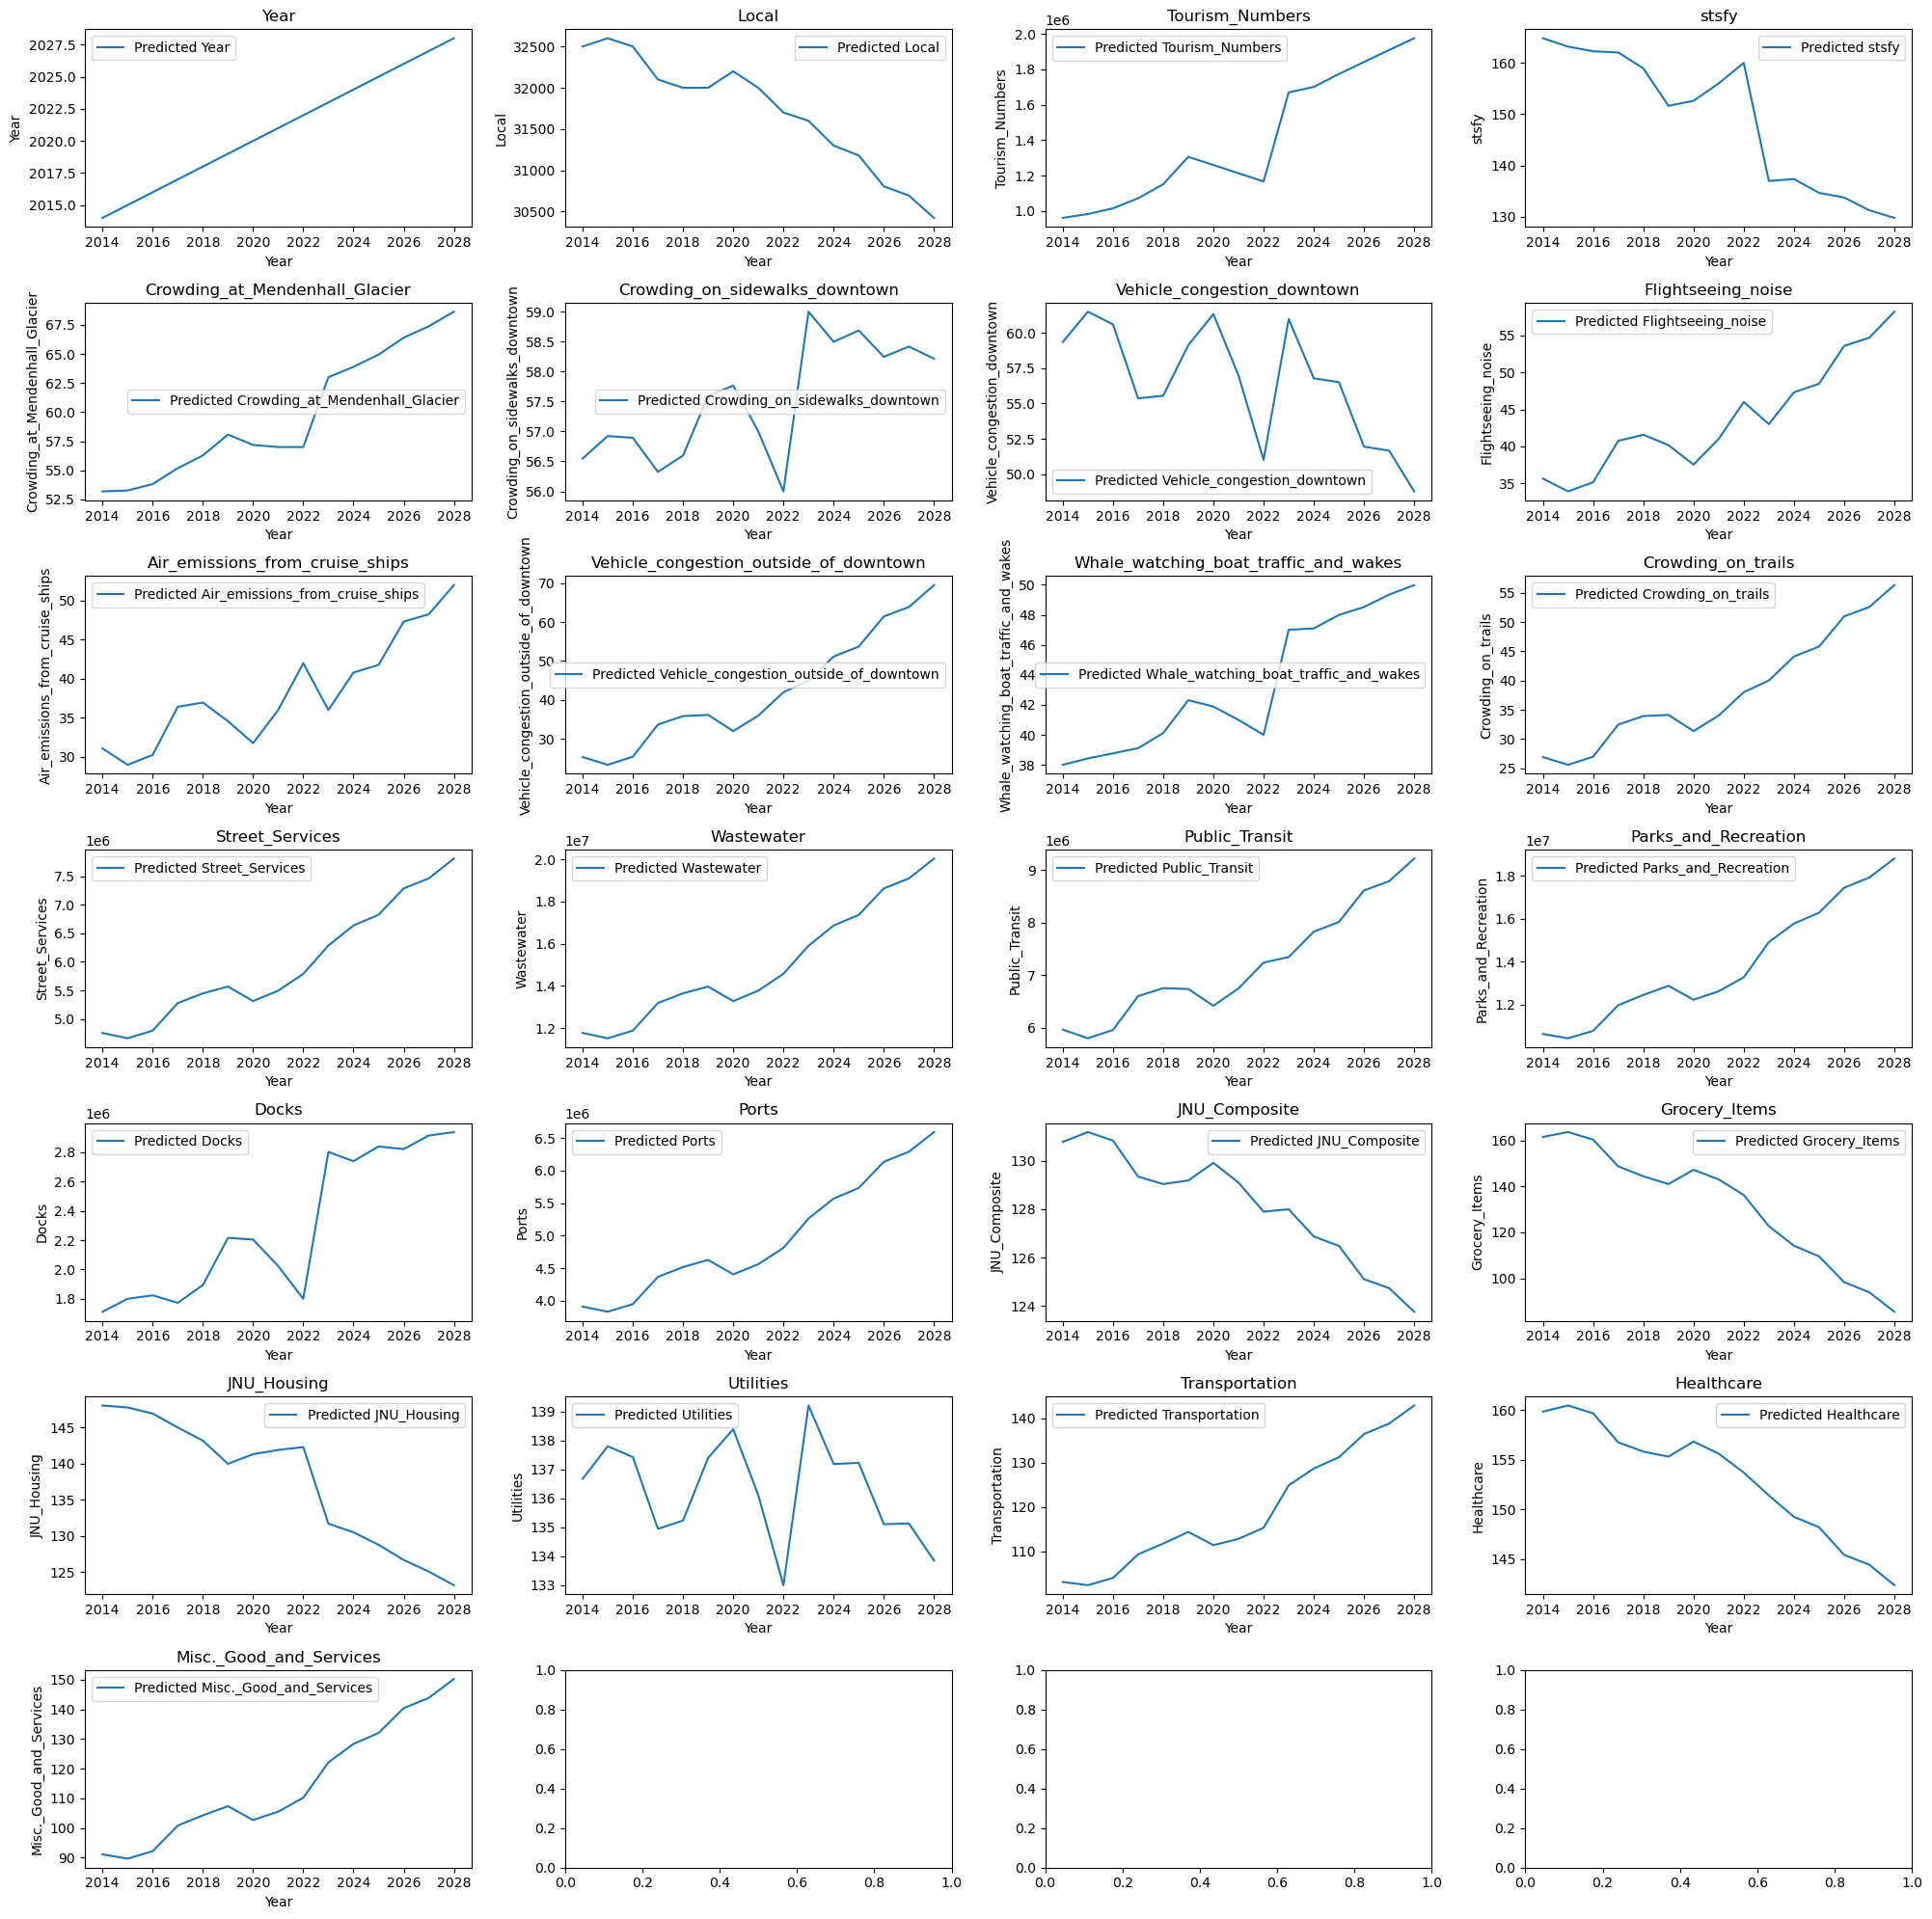

In [51]:
# 画图
fig, axs = plt.subplots(7, 4, figsize=(20, 20))
axs = axs.flatten()

for idx, key in enumerate(td_pred.keys()):
    axs[idx].plot(td["Year"], td_pred[key], label=f'Predicted {key}')
    axs[idx].set_title(key)
    axs[idx].set_xlabel('Year')
    axs[idx].set_ylabel(key)
    axs[idx].legend()

plt.tight_layout()
plt.show()

游客量和指标的关系

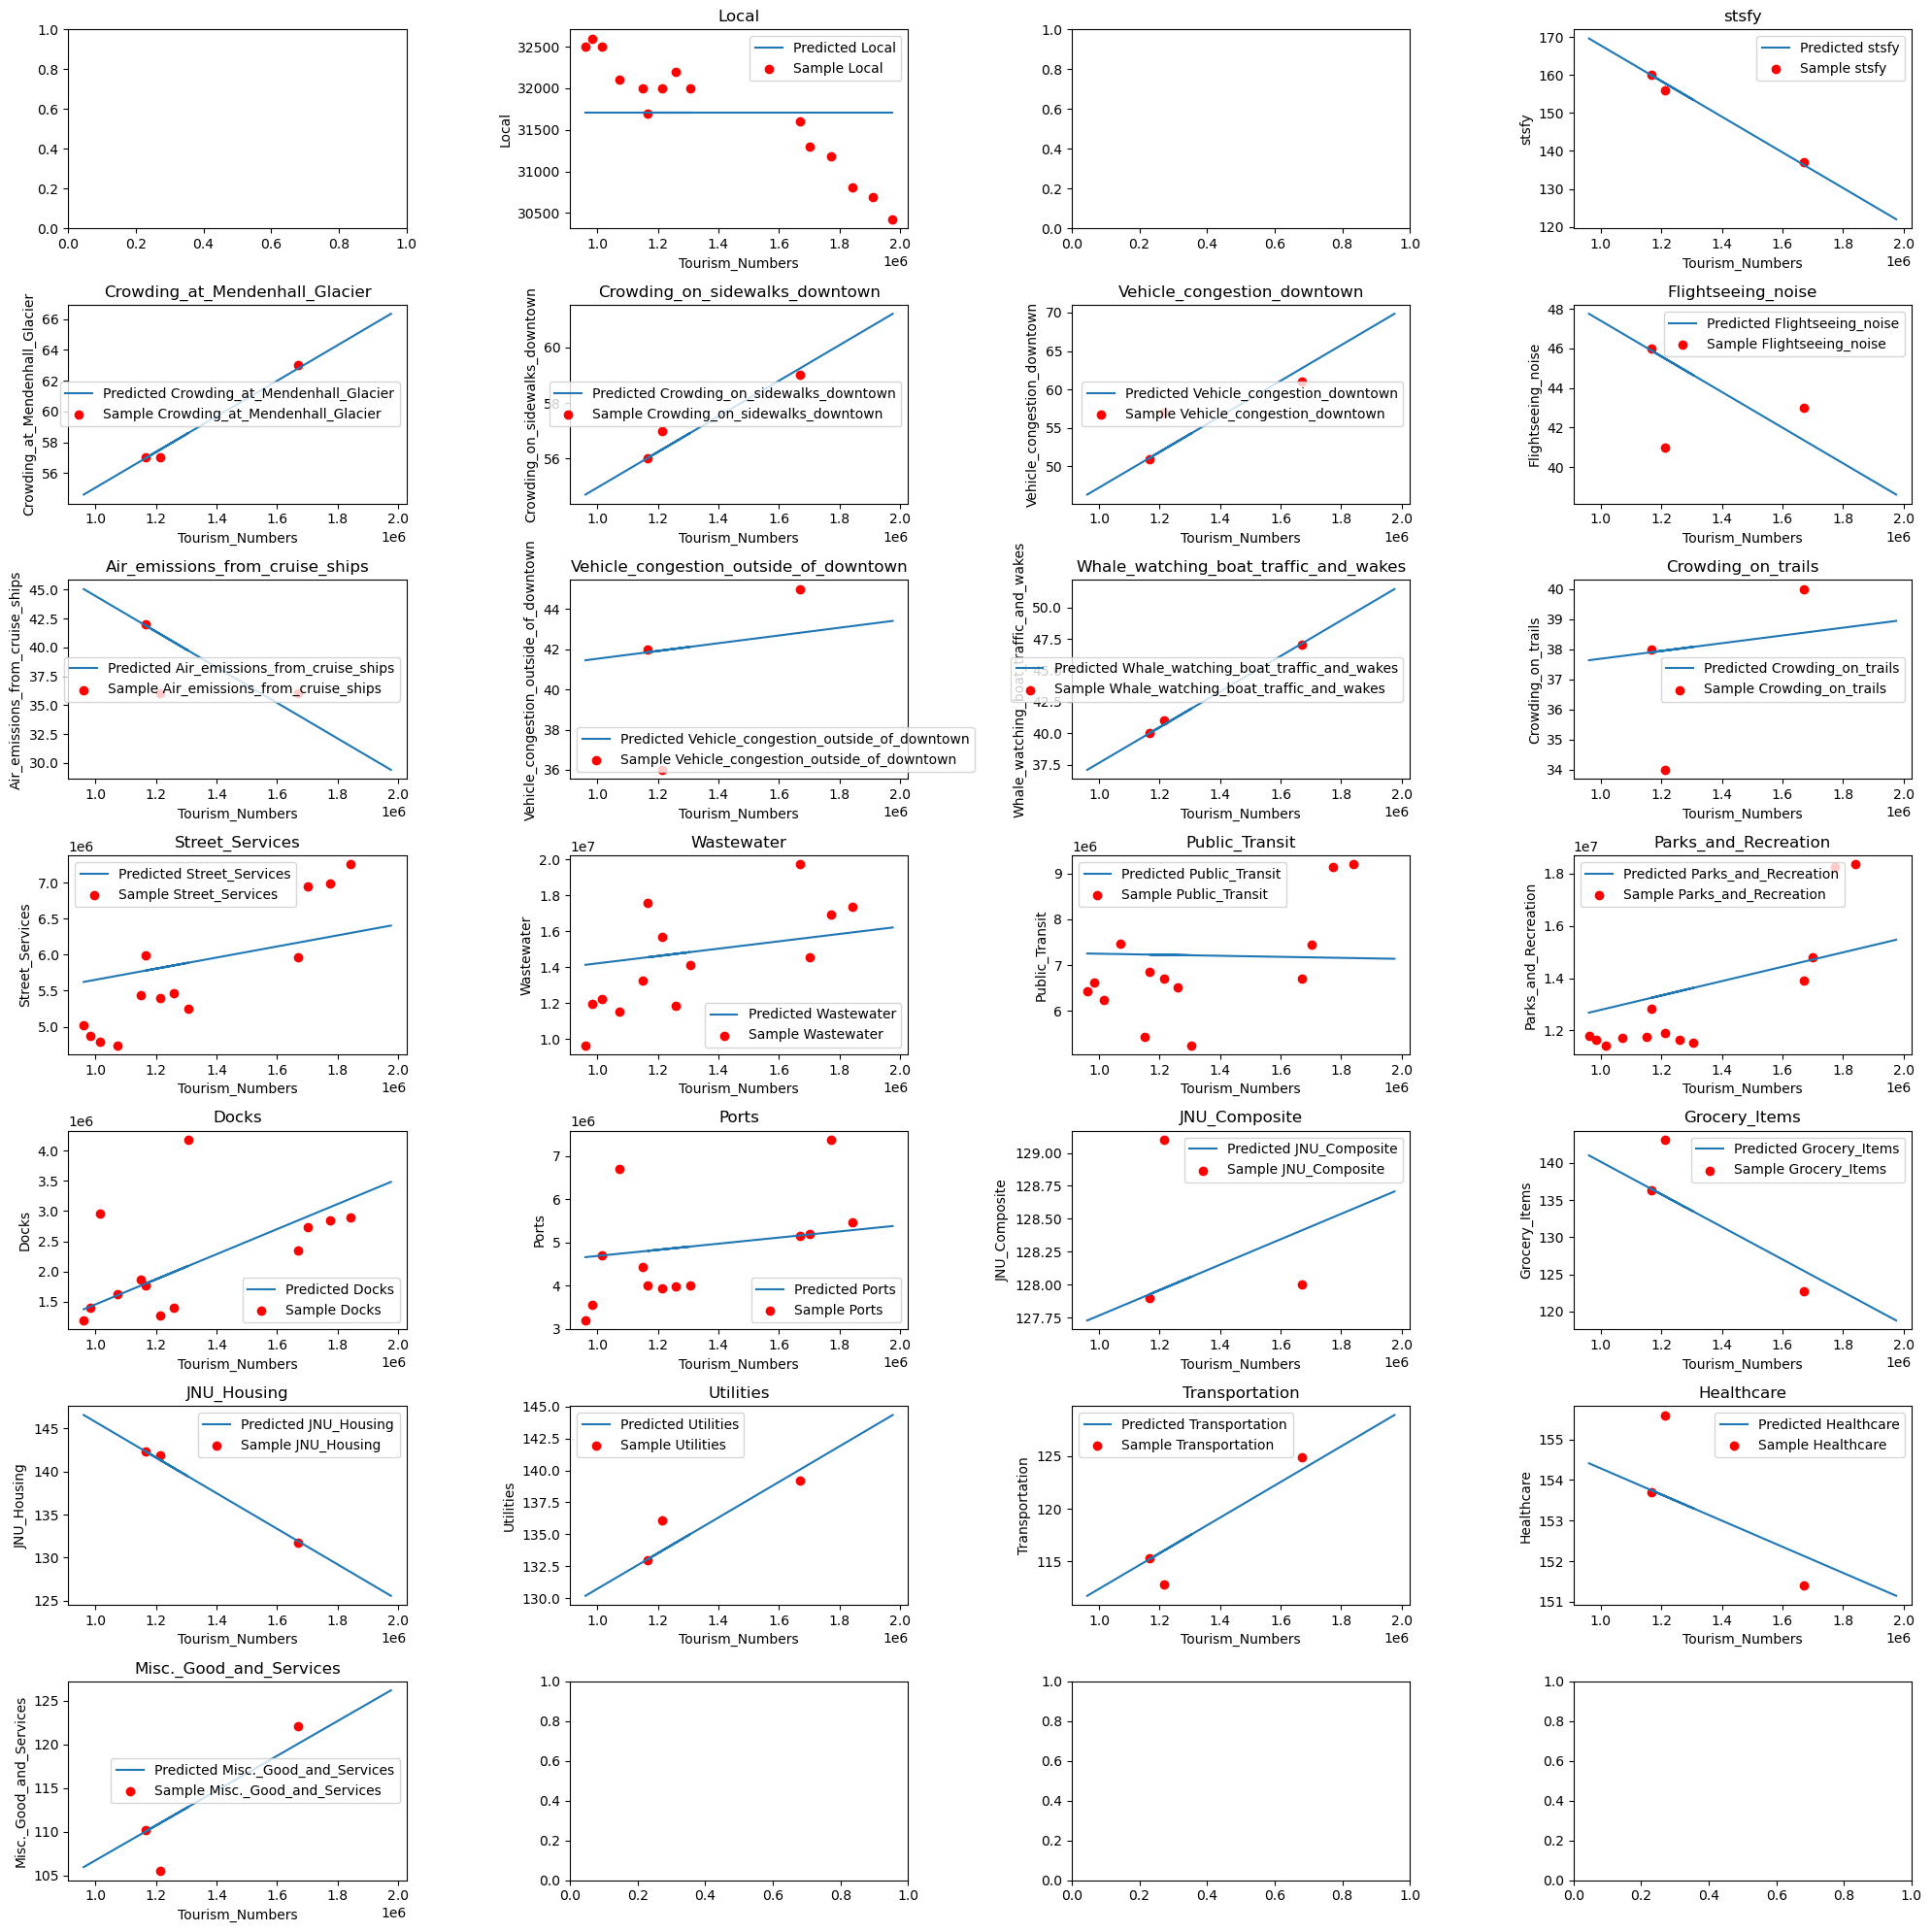

In [52]:
# 画图
fig, axs = plt.subplots(7, 4, figsize=(20, 20))
axs = axs.flatten()

x2_fixed = np.mean(X2) # Use the mean of the Local column
X_x2_fixed = np.hstack((X1, np.full(X1.shape, x2_fixed)))


for idx, key in enumerate(td_pred.keys()):
    if key == "Tourism_Numbers" or key == "Year":
        continue
    model = models[key]
    y = model.predict(X_x2_fixed)
    axs[idx].plot(td["Tourism_Numbers"], y, label=f'Predicted {key}')    
    
    valid_samples = np.array(td[key]) != -1
    axs[idx].scatter(np.array(td["Tourism_Numbers"])[valid_samples], np.array(td[key])[valid_samples], color='red', label=f'Sample {key}')
    axs[idx].set_title(key)
    axs[idx].set_xlabel('Tourism_Numbers')
    axs[idx].set_ylabel(key)
    axs[idx].legend()

plt.tight_layout()
plt.show()

In [53]:
# 保存模型和data
import pickle

with open('b_lr_models.pkl', 'wb') as f:
    pickle.dump(models, f)

td_pred_df = pd.DataFrame(td_pred)

td_pred_df.to_csv('b_td_pred.csv', index=False)
    

In [54]:
# 读取模型和data
with open('b_lr_models.pkl', 'rb') as f:
    models = pickle.load(f)

with open('b_td_pred.csv', 'rb') as f:
    td_pred_df = pd.read_csv(f)

画出三维图像

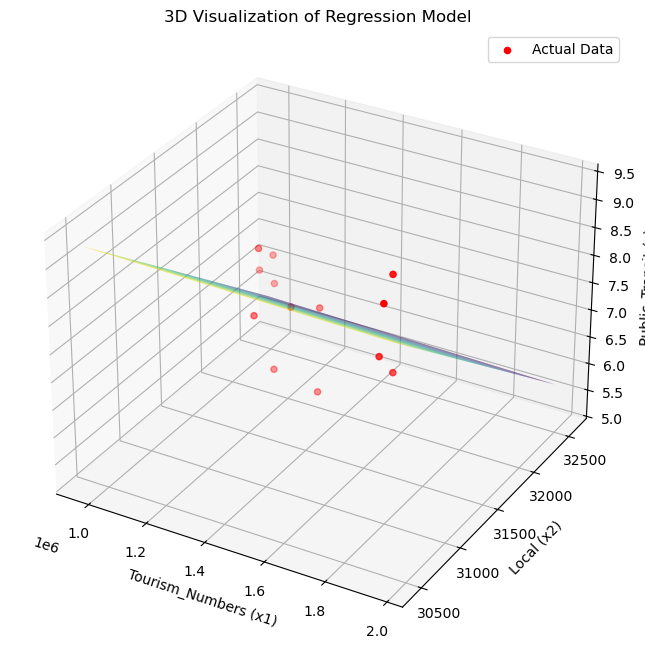

In [55]:
# 假设模型已经训练好
model = models["Public_Transit"]  # 替换为目标变量对应的模型
intercept = model.intercept_[0]
coef_x1 = model.coef_[0][0]  # x1 的系数
coef_x2 = model.coef_[0][1]  # x2 的系数

# 生成 x1 和 x2 的网格数据
x1_range = np.linspace(min(td["Tourism_Numbers"]), max(td["Tourism_Numbers"]), 100)
x2_range = np.linspace(min(td["Local"]), max(td["Local"]), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# 根据模型计算预测的 z 值
z_pred = intercept + coef_x1 * x1_grid + coef_x2 * x2_grid

# 创建 3D 图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制平面
ax.plot_surface(x1_grid, x2_grid, z_pred, cmap="viridis", alpha=0.8)

# 添加散点：原始数据
valid_samples = np.array(td["Public_Transit"]) != -1  # 过滤有效样本
x1_valid = np.array(td["Tourism_Numbers"])[valid_samples]
x2_valid = np.array(td["Local"])[valid_samples]
z_valid = np.array(td["Public_Transit"])[valid_samples]
ax.scatter(x1_valid, x2_valid, z_valid, color='red', label='Actual Data')

# 设置坐标轴标签
ax.set_xlabel("Tourism_Numbers (x1)")
ax.set_ylabel("Local (x2)")
ax.set_zlabel("Public_Transit (z)")
ax.set_title("3D Visualization of Regression Model")

# 显示图例
ax.legend()

# 显示图形
plt.show()
